<a href="https://colab.research.google.com/github/ToluPaul/Fifa-22_analysis/blob/main/Fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#show the first five columns of the dataset
p21 = pd.read_csv("/content/players_21.csv")
display(p21.head())

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
#display the number of rows and columns and the columns in the dataset
print('The number of rows and columns is {}'.format(p21.shape))
print('')
display(p21.columns)

The number of rows and columns is (18944, 110)



Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [4]:
#identify useful columns in the dataset and what the url columns entails
p21[['player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url']].head()

,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
#drop the url columns because it wont be needed for analysis
p21_clean = p21.drop(['player_face_url', 'player_url','club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url', 'long_name'], axis = 1)
display(len(p21_clean.columns))

103

In [6]:
#check the properties of the column
for k, i  in p21_clean.dtypes.iteritems():
  print(k,':', i)

sofifa_id : int64
short_name : object
player_positions : object
overall : int64
potential : int64
value_eur : float64
wage_eur : float64
age : int64
dob : object
height_cm : int64
weight_kg : int64
club_team_id : float64
club_name : object
league_name : object
league_level : float64
club_position : object
club_jersey_number : float64
club_loaned_from : object
club_joined : object
club_contract_valid_until : float64
nationality_id : int64
nationality_name : object
nation_team_id : float64
nation_position : object
nation_jersey_number : float64
preferred_foot : object
weak_foot : int64
skill_moves : int64
international_reputation : int64
work_rate : object
body_type : object
real_face : object
release_clause_eur : float64
player_tags : object
player_traits : object
pace : float64
shooting : float64
passing : float64
dribbling : float64
defending : float64
physic : float64
attacking_crossing : int64
attacking_finishing : int64
attacking_heading_accuracy : int64
attacking_short_passing : i

<ipython-input-6-1bfce4596f89>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, i  in p21_clean.dtypes.iteritems():


In [7]:
#check the league_level and dob columns
p21_clean[['dob', 'league_level']]

,dob,league_level
0,1987-06-24,1.0
1,1985-02-05,1.0
2,1988-08-21,1.0
3,1992-02-05,1.0
4,1991-06-28,1.0
...,...,...
18939,1999-04-26,1.0
18940,1999-01-07,1.0
18941,1991-11-20,1.0
18942,2003-03-30,4.0


In [8]:
#change dob to datetime object and any column that ends with id to a category datatype
p21_clean['dob'] = pd.to_datetime(p21_clean['dob'])
p21_clean['league_level'] = p21_clean['league_level'].astype('category')
p21_clean['nationality_name'] = p21_clean['nationality_name'].astype('category')
for i in p21_clean.dtypes.keys():
    if '_id' in i:
      p21_clean[i] = p21_clean[i].astype('category')
    else:
      p21_clean[i] = p21_clean[i]
for k, i  in p21_clean.dtypes.iteritems():
  print(k,':', i)

sofifa_id : category
short_name : object
player_positions : object
overall : int64
potential : int64
value_eur : float64
wage_eur : float64
age : int64
dob : datetime64[ns]
height_cm : int64
weight_kg : int64
club_team_id : category
club_name : object
league_name : object
league_level : category
club_position : object
club_jersey_number : float64
club_loaned_from : object
club_joined : object
club_contract_valid_until : float64
nationality_id : category
nationality_name : category
nation_team_id : category
nation_position : object
nation_jersey_number : float64
preferred_foot : object
weak_foot : int64
skill_moves : int64
international_reputation : int64
work_rate : object
body_type : object
real_face : object
release_clause_eur : float64
player_tags : object
player_traits : object
pace : float64
shooting : float64
passing : float64
dribbling : float64
defending : float64
physic : float64
attacking_crossing : int64
attacking_finishing : int64
attacking_heading_accuracy : int64
attackin

<ipython-input-8-27c7bee4b9cc>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, i  in p21_clean.dtypes.iteritems():


In [9]:
#check quick stats of the data
p21_clean.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_jersey_number,club_contract_valid_until,nation_jersey_number,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18944.000000,18944.000000,1.870700e+04,18719.000000,18944.000000,18944.000000,18944.000000,18719.000000,18719.000000,1127.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,2083.000000
mean,65.677787,71.086729,2.902288e+06,9148.482825,25.225823,181.190773,75.016892,20.589668,2021.983332,12.029281,...,57.978674,46.470017,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309,37.203553
std,7.002278,6.109985,7.743775e+06,19893.149956,4.697354,6.825672,7.057140,17.057568,1.260426,6.674627,...,12.118390,20.169591,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121,10.714523
min,47.000000,47.000000,9.000000e+03,500.000000,16.000000,155.000000,50.000000,1.000000,2020.000000,1.000000,...,12.000000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,9.000000,2021.000000,6.000000,...,50.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,28.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,18.000000,2022.000000,12.000000,...,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,37.000000
75%,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,27.000000,2023.000000,18.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,93.000000,95.000000,1.855000e+08,560000.000000,53.000000,206.000000,110.000000,99.000000,2028.000000,27.000000,...,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000,65.000000


In [10]:
#check for columns with null values
display(p21_clean.isnull().values.any())
#p21_clean_null_columns = p21_clean[p21_clean.isnull() > 0].sum()
p21_clean.isna().sum() > 0
for i, k in p21_clean.isna().sum().iteritems() :
    if  k > 0:
      print(i, ':' ,k)

True

value_eur : 237
wage_eur : 225
club_team_id : 225
club_name : 225
league_name : 225
league_level : 225
club_position : 225
club_jersey_number : 225
club_loaned_from : 18186
club_joined : 983
club_contract_valid_until : 225
nation_team_id : 17817
nation_position : 17817
nation_jersey_number : 17817
release_clause_eur : 995
player_tags : 17536
player_traits : 10629
pace : 2083
shooting : 2083
passing : 2083
dribbling : 2083
defending : 2083
physic : 2083
goalkeeping_speed : 16861


<ipython-input-10-e92e18c5790d>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, k in p21_clean.isna().sum().iteritems() :


In [11]:
p21[p21['goalkeeping_speed'].isna()]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


In [12]:
#drop columns with missing values above 10,000 and 'club_joined'
p21_deep_clean = p21_clean.drop(['club_loaned_from','nation_team_id','nation_position','club_joined',
                                 'nation_jersey_number', 'player_tags','player_traits',
                                 ], axis = 1)
#drop rows with missing values on league_level and physic and fill the null values of wage value
#... value and goalkeeping_speed with 0(not all playeres are goalkeepers)
p21_deep_clean = p21_deep_clean.dropna(subset = ['league_level', 'physic']).fillna(
    {'release_clause_eur':0, 'value_eur':0, 'goalkeeping_speed' : 0})
print('Is there any missing value?')
print('')
print('Answer : {}'.format(p21_deep_clean.isnull().values.any()))

Is there any missing value?

Answer : False


In [13]:
#check quick summary statistics
p21_deep_clean.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_jersey_number,club_contract_valid_until,weak_foot,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,16666.000000,16666.000000,1.666600e+04,16666.000000,16666.000000,16666.000000,16666.000000,16666.000000,16666.00000,16666.000000,...,16666.000000,16666.000000,16666.000000,16666.000000,16666.000000,16666.000000,16666.000000,16666.000000,16666.000000,16666.0
mean,65.774031,71.229149,2.994158e+06,9468.705748,25.052622,180.312733,74.191648,20.522141,2021.99604,2.989800,...,59.935857,50.409396,51.712048,49.437177,10.416477,10.470359,10.459078,10.421277,10.424637,0.0
std,6.906669,6.077763,7.801520e+06,20315.788468,4.557404,6.516733,6.710551,16.725410,1.26177,0.645056,...,10.366035,17.522081,18.824012,18.720444,3.216241,3.178195,3.271022,3.223277,3.170804,0.0
min,47.000000,47.000000,0.000000e+00,500.000000,16.000000,155.000000,50.000000,1.000000,2020.00000,1.000000,...,30.000000,7.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,61.000000,67.000000,5.000000e+05,1000.000000,21.000000,176.000000,70.000000,9.000000,2021.00000,3.000000,...,53.000000,36.000000,35.000000,33.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.0
50%,66.000000,71.000000,1.000000e+06,3000.000000,25.000000,180.000000,74.000000,18.000000,2022.00000,3.000000,...,60.000000,55.000000,58.000000,55.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0
75%,70.000000,75.000000,2.100000e+06,9000.000000,28.000000,185.000000,79.000000,27.000000,2023.00000,3.000000,...,67.000000,64.000000,66.000000,64.000000,13.000000,13.000000,13.000000,13.000000,13.000000,0.0
max,93.000000,95.000000,1.855000e+08,560000.000000,53.000000,203.000000,110.000000,99.000000,2028.00000,5.000000,...,96.000000,94.000000,93.000000,90.000000,67.000000,75.000000,75.000000,66.000000,63.000000,0.0


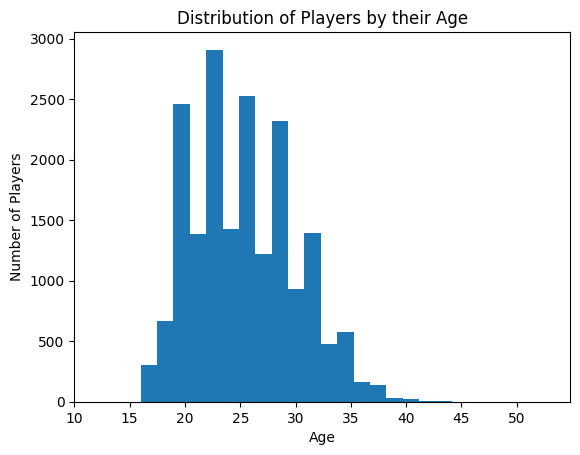

In [14]:
#check the distribution of ages
age = p21['age']
age_distribution = age.value_counts().sort_index()
plt.hist(age, bins = 25)
len = range(10,55,5)
plt.xticks(ticks =len)
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by their Age')
plt.show()


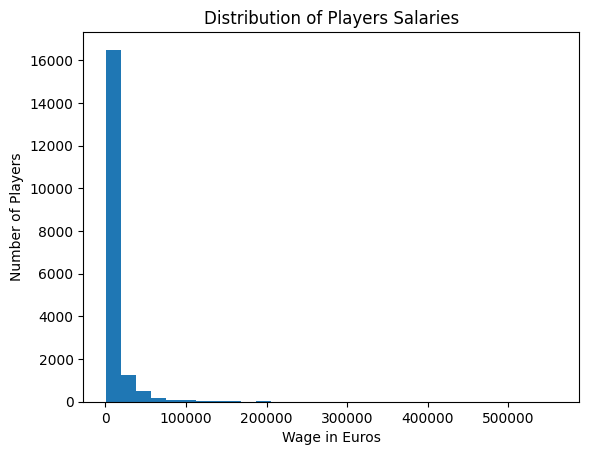

In [15]:
#check the distribution of players salary
plt.hist(p21.wage_eur.dropna(), bins = 30)
plt.xlabel('Wage in Euros')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Salaries')
plt.show()

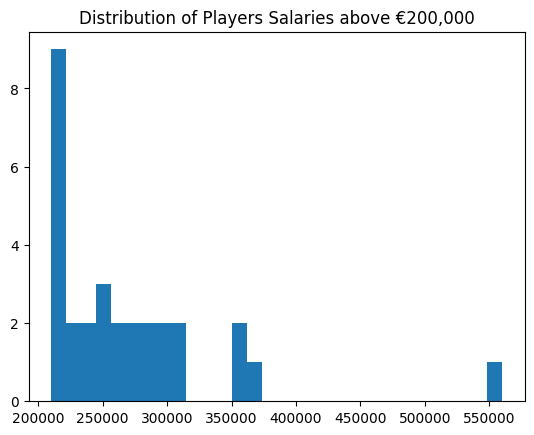

In [16]:
#check the distribution of players salary above 200,000
above_200000 = p21.loc[p21['wage_eur'] > 200000]
plt.hist(above_200000.wage_eur.dropna(), bins = 30)
plt.title('Distribution of Players Salaries above €200,000')
plt.show()

In [17]:
#write a function that plots the distribution of salaries in a specified range
def salary_distribution(x, sign):
  ''' This function plots a graph on the distribution players wages within a given range'''
  if sign == '>' :
    above  = p21.loc[p21['wage_eur'] > x]
    plt.hist(above.wage_eur.dropna(), bins = 10)
  elif sign == '<' :
    below  = p21.loc[p21['wage_eur'] < x]
    plt.hist(below.wage_eur.dropna(), bins = 10)
  plt.xlabel('Wage in Euros')
  plt.ylabel('Number of Players')
  plt.title('Distribution of Players Salaries')
  plt.show()

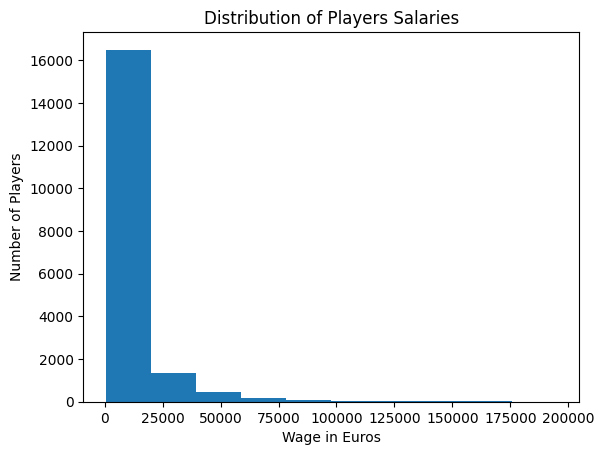

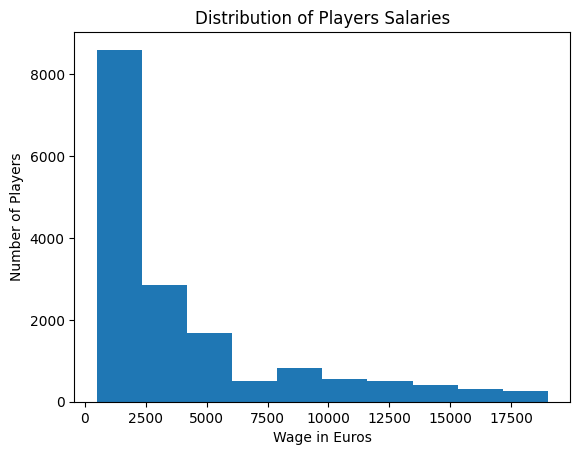

In [56]:
salary_distribution(200000, sign = '<')
salary_distribution(20000, sign = '<')

In [19]:
#find the correlation between wage and potential
print(p21_deep_clean['wage_eur'].corr(p21_deep_clean['potential']))

0.4864737290806272


In [20]:
print(p21_deep_clean['wage_eur'].corr(p21_deep_clean['overall']))

0.5962154304839128


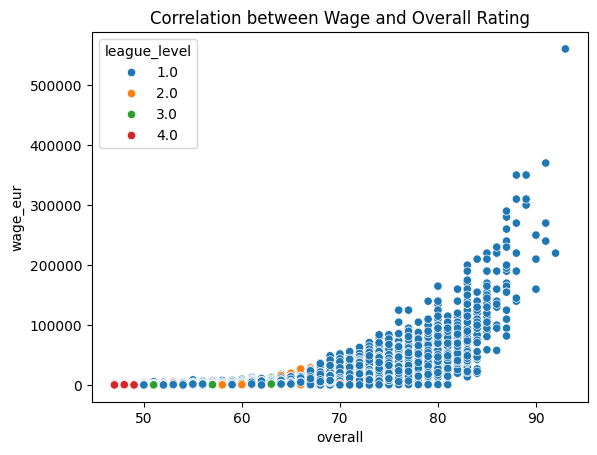

In [21]:
#scatterplot of overall rating vs wages grouped by league level
sns.scatterplot(x='overall', y = 'wage_eur', data= p21_deep_clean, hue='league_level')
plt.title('Correlation between Wage and Overall Rating')
plt.show()

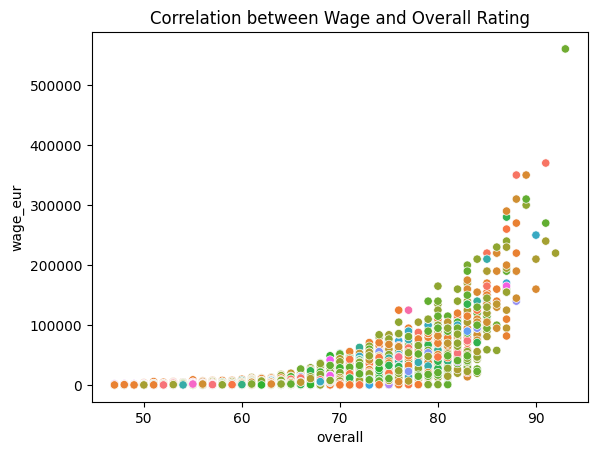

In [22]:
#scatterplot of overall rating vs wages grouped by league nationality_id
sns.scatterplot(x='overall', y = 'wage_eur', data= p21_deep_clean, hue='nationality_id')
plt.legend([],[],frameon=False)
plt.title('Correlation between Wage and Overall Rating')
plt.show()

In [23]:
print('The minimum wage is €{}'.format(p21['wage_eur'].min( )))
print('The maximum wage is €{}'.format(p21['wage_eur'].max( )))
print('The average wage is €{}'.format(p21['wage_eur'].mean()))

The minimum wage is €500.0
The maximum wage is €560000.0
The average wage is €9148.48282493723


In [24]:
top_earners = p21.sort_values('wage_eur', ascending=False)

In [25]:
print(top_earners[['short_name', 'wage_eur']].reset_index(drop=True).head(10))

     short_name  wage_eur
0      L. Messi  560000.0
1  K. De Bruyne  370000.0
2     E. Hazard  350000.0
3    K. Benzema  350000.0
4      T. Kroos  310000.0
5      Casemiro  310000.0
6     S. Agüero  300000.0
7  Sergio Ramos  300000.0
8  A. Griezmann  290000.0
9     L. Suárez  280000.0


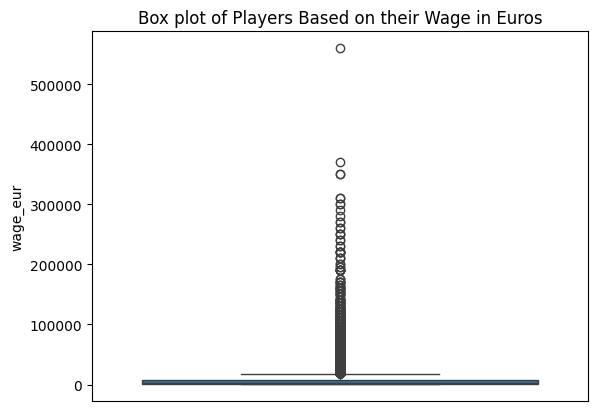

In [26]:
#check for the high earners
sns.boxplot(data = p21, y='wage_eur')
plt.title('Box plot of Players Based on their Wage in Euros')
plt.tick_params(axis = 'x', labelbottom = False, bottom = False)
plt.show()

In [27]:
#remove the outliers
wage_array = np.array(p21_deep_clean[['wage_eur']])

In [28]:
print(wage_array)

[[5.6e+05]
 [2.2e+05]
 [2.4e+05]
 ...
 [2.0e+03]
 [5.0e+02]
 [5.0e+02]]


In [29]:
#calculate upper and lower percentile
sort_wage = p21_deep_clean['wage_eur'].sort_values()
mid_sort_wage = sort_wage.median()
q75, q25 = np.percentile(p21_deep_clean['wage_eur'], [75, 25])
iqr = q75 - q25

In [30]:
print(q75, iqr)

9000.0 8000.0


In [31]:
upper_whisker = q75 + (1.5*iqr)
print(upper_whisker)

21000.0


In [32]:
no_outlier = np.where(p21_deep_clean['wage_eur'] <= upper_whisker)
outlier = np.where(p21_deep_clean['wage_eur'] > upper_whisker)
print(p21[['short_name', 'wage_eur']].loc[outlier].head())
print('')
print(p21[['short_name', 'wage_eur']].loc[no_outlier].head())

          short_name  wage_eur
0           L. Messi  560000.0
1  Cristiano Ronaldo  220000.0
2     R. Lewandowski  240000.0
3          Neymar Jr  270000.0
4       K. De Bruyne  370000.0

        short_name  wage_eur
106    Azpilicueta  120000.0
122    L. Goretzka  105000.0
124      T. Partey   81000.0
125       Grimaldo   20000.0
126  N. Tagliafico   27000.0


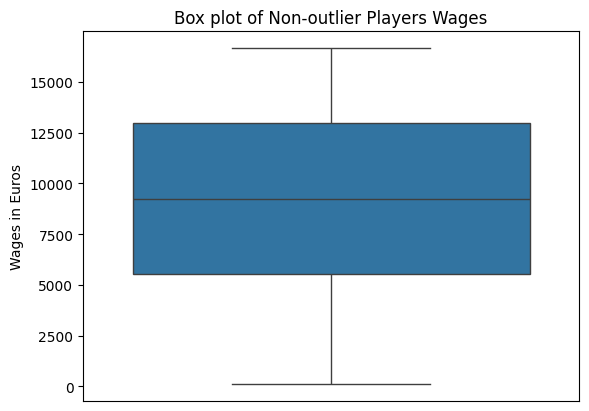

In [33]:
#create a boxplot with no outliers
sns.boxplot(data = no_outlier)
plt.title('Box plot of Non-outlier Players Wages')
plt.ylabel('Wages in Euros')
plt.tick_params(axis = 'x', labelbottom = False, bottom = False)
plt.show()

In [34]:
#display the stats about outliers
len_outliers = p21[p21['wage_eur'] > upper_whisker].index.size
len_no_outliers = p21['wage_eur'].loc[no_outlier].index.size

print('The number of players who are outliers based on earning is {}'.format(len_outliers))
print('The number of players who are not outliers based on earning is {}'.format(len_no_outliers))
print('The percentage of the top paid players is {}'.format(round(len_outliers/(p21.index.size) * 100)))
print('')
print('The Wages of the top paid players is €{} and above'.format(upper_whisker))

The number of players who are outliers based on earning is 1975
The number of players who are not outliers based on earning is 14833
The percentage of the top paid players is 10

The Wages of the top paid players is €21000.0 and above


In [35]:
#Check the correlation between wage and overall without outliers
print(p21['wage_eur'].loc[no_outlier].corr(p21['overall'].loc[no_outlier]))
p21_no_outlier = p21.loc[no_outlier]

0.636835193350274


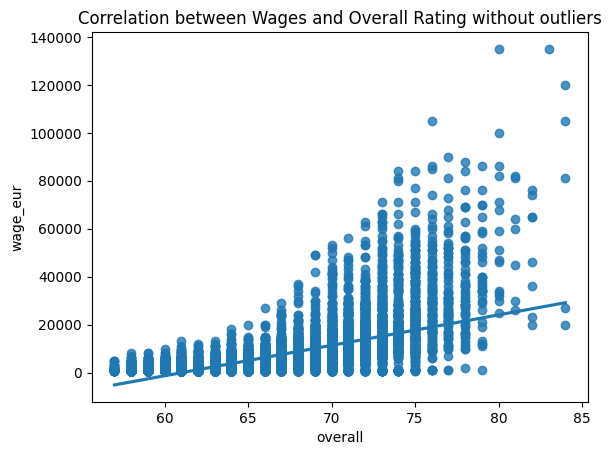


There is a moderate correlation between Wages and Overall Rating without outliers


In [36]:
sns.regplot(x='overall', y = 'wage_eur', data= p21_no_outlier, ci=None)
plt.title('Correlation between Wages and Overall Rating without outliers')
plt.show()
print('')
print('There is a moderate correlation between Wages and Overall Rating without outliers')

In [37]:
#is any player paid less than 0 euros?
np.sum([p21_deep_clean['wage_eur'] < 0])

0

In [38]:
#Instantiate a model that uses this correlation to predict the wages of a player based on their rating
wage_eur_vs_overall = ols("wage_eur ~ overall", data = p21_no_outlier)
wage_eur_vs_overall = wage_eur_vs_overall.fit()
print(wage_eur_vs_overall.params)

Intercept   -77583.89671
overall       1270.40458
dtype: float64


In [39]:
#Make a prediction of a range of values
explanatory_data = pd.DataFrame({'overall':np.arange(60,81)})
prediction_data = explanatory_data.assign(
    wage_eur = wage_eur_vs_overall.predict(explanatory_data))
print(prediction_data)

    overall      wage_eur
0        60  -1359.621915
1        61    -89.217335
2        62   1181.187245
3        63   2451.591825
4        64   3721.996405
5        65   4992.400985
6        66   6262.805565
7        67   7533.210145
8        68   8803.614725
9        69  10074.019305
10       70  11344.423885
11       71  12614.828465
12       72  13885.233045
13       73  15155.637624
14       74  16426.042204
15       75  17696.446784
16       76  18966.851364
17       77  20237.255944
18       78  21507.660524
19       79  22778.065104
20       80  24048.469684


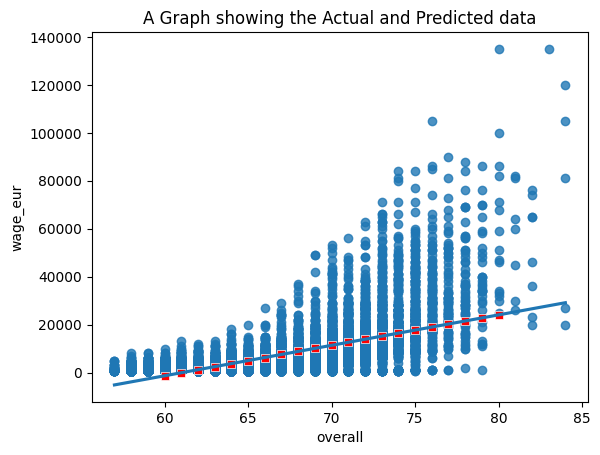

In [40]:
#Plot a graph of the original dataset and the predicted values
fig = plt.figure()
sns.regplot(x='overall', y = 'wage_eur', data= p21_no_outlier, ci=None)
sns.scatterplot(x='overall', y = 'wage_eur', data= prediction_data, color ='r', marker ='s')
plt.title('A Graph showing the Actual and Predicted data')
plt.show()

In [41]:
#comment
#Is the ols function a good option for prediction?
print('The ols function is not the best aproach as there is no such thing as a negative wage')
print('')
print('We would have a Part 2 for prediction of the dataset to be carried out...')

The ols function is not the best aproach as there is no such thing as a negative wage

We would have a Part 2 for prediction of the dataset to be carried out...


In [42]:
#unique countries
p21['nationality_id'].nunique()

162

In [43]:
#select the columns you would be making use of
feat_col= ['value_eur', 'height_cm', 'weight_kg', 'potential', 'age', 'league_level']
targ_col = ['wage_eur']

In [44]:
featuresss = p21_no_outlier[feat_col]
featuresss['value_eur'] =  featuresss['value_eur'].fillna({'value_eur':0})
featuresss.head()

<ipython-input-44-7f10c11653b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuresss['value_eur'] =  featuresss['value_eur'].fillna({'value_eur':0})


,value_eur,height_cm,weight_kg,potential,age,league_level
106,36500000.0,178,77,84,30,1.0
122,58500000.0,189,76,88,25,1.0
124,48000000.0,185,77,85,27,1.0
125,56000000.0,171,69,88,24,1.0
126,40500000.0,172,65,84,27,1.0


In [45]:
#create a column for calculating bmi
featuresss['bmi'] = (featuresss['weight_kg'])/((featuresss['height_cm']/100) **2)
featuresss.head()

<ipython-input-45-f74c3a6c9d28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuresss['bmi'] = (featuresss['weight_kg'])/((featuresss['height_cm']/100) **2)


,value_eur,height_cm,weight_kg,potential,age,league_level,bmi
106,36500000.0,178,77,84,30,1.0,24.302487
122,58500000.0,189,76,88,25,1.0,21.276000
124,48000000.0,185,77,85,27,1.0,22.498174
125,56000000.0,171,69,88,24,1.0,23.597004
126,40500000.0,172,65,84,27,1.0,21.971336


In [46]:
#get dummies for categorical variables
league_level_dummies = pd.get_dummies(featuresss['league_level'], drop_first= True)
league_level_dummies.head()

,2.0,3.0,4.0
106,0,0,0
122,0,0,0
124,0,0,0
125,0,0,0
126,0,0,0


In [47]:
#join the dummies dataframe to the features dataframe
featur = pd.concat([featuresss, league_level_dummies], axis=1)
featur = featur.drop('league_level', axis=1)
featur.head()

,value_eur,height_cm,weight_kg,potential,age,bmi,2.0,3.0,4.0
106,36500000.0,178,77,84,30,24.302487,0,0,0
122,58500000.0,189,76,88,25,21.276000,0,0,0
124,48000000.0,185,77,85,27,22.498174,0,0,0
125,56000000.0,171,69,88,24,23.597004,0,0,0
126,40500000.0,172,65,84,27,21.971336,0,0,0


In [48]:
#p21_clean_nouiuyo = p21_no_outlier.drop('nation_logo_url', axis=1)
#p21_clean_nout = p21_no_outlier.dropna()
#p21_clean_nouiuyo
featur =  featur.fillna({'value_eur':0})
featur.isna().sum()

value_eur    0
height_cm    0
weight_kg    0
potential    0
age          0
bmi          0
2.0          0
3.0          0
4.0          0
dtype: int64

In [49]:
model_list = ['value_eur', 'height_cm', 'weight_kg', 'potential', 'age', 'league_level','wage_eur']

In [50]:
#check for missing values in the data for modeling
model_data = p21_no_outlier[model_list]
model_data.isna().sum()

value_eur       198
height_cm         0
weight_kg         0
potential         0
age               0
league_level    187
wage_eur        187
dtype: int64

In [51]:
#remove missing values and check for the data for modelling again
model_data = model_data.dropna(subset = ['wage_eur'])
model_data = model_data.fillna({'value_eur':0})
model_data.isna().sum()

value_eur       0
height_cm       0
weight_kg       0
potential       0
age             0
league_level    0
wage_eur        0
dtype: int64

In [52]:
#create the data for modelling
model_data_dummies = pd.get_dummies(model_data['league_level'], drop_first= True)
model_data = pd.concat([model_data, model_data_dummies], axis=1)
model_data['bmi'] = (model_data['weight_kg'])/((model_data['height_cm']/100) **2)
model_data = model_data.drop('league_level', axis=1)
model_data = model_data.drop(['weight_kg', 'height_cm'], axis=1)
print(model_data.head())
print('')
print(model_data.isna().sum())


      value_eur  potential  age  wage_eur  2.0  3.0  4.0        bmi
106  36500000.0         84   30  120000.0    0    0    0  24.302487
122  58500000.0         88   25  105000.0    0    0    0  21.276000
124  48000000.0         85   27   81000.0    0    0    0  22.498174
125  56000000.0         88   24   20000.0    0    0    0  23.597004
126  40500000.0         84   27   27000.0    0    0    0  21.971336

value_eur    0
potential    0
age          0
wage_eur     0
2.0          0
3.0          0
4.0          0
bmi          0
dtype: int64


In [53]:
#reshape from one dimension to two dimensional array
y= model_data['wage_eur'].values.reshape(-1,1)
y.shape

(14646, 1)

[ 1.84448305e-03  4.66926972e+02  6.05615825e+02 -5.94543928e+02
 -1.31708947e+03  4.43171552e+02  6.54901096e+00]



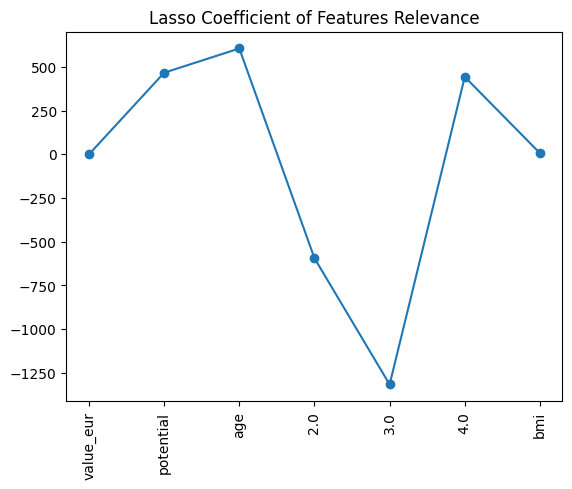

In [54]:
#Check which features are the most relevant
X = model_data.drop('wage_eur', axis=1).values
y= model_data['wage_eur'].values.reshape(-1,1)
feature_col = model_data.drop('wage_eur', axis=1).columns.to_list()
lasso = Lasso(alpha=1)
lasso.fit(X, y)

lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
print('')

fig, ax = plt.subplots()
plt.plot(feature_col, lasso_coef, marker = 'o')
plt.xticks(rotation=90)
plt.title('Lasso Coefficient of Features Relevance')
#plt.savefig('Lasso_coefficient.png')
plt.show()


In [55]:
#create a linear_regression model and check its accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r_squared = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R^2 : {}'.format(r_squared))
print('RMSE : {}'.format(rmse))

R^2 : 0.5030469431735081
RMSE : 6795.148783300672
